In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
df = pd.read_csv("/kaggle/input/ha-noi/2000-2025.csv")
df

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

rain_hour = 0
rain_hour_list = []

for i in range(len(df)):
    if df.loc[i, 'precipitation'] > 0:  # Nếu có mưa
        if i > 0 and df.loc[i - 1, 'precipitation'] > 0:  # Mưa nối tiếp
            delta = (df.loc[i, 'datetime'] - df.loc[i - 1, 'datetime']).seconds / 3600
            rain_hour += delta
        else:  # Bắt đầu cơn mưa mới
            rain_hour = 1  # Giờ đầu tiên
    else:  # Không mưa
        rain_hour = 0
    rain_hour_list.append(rain_hour)

df['rain_hour'] = rain_hour_list

unrain_hour = 0
unrain_hour_list = []

for i in range(len(df)):
    if df.loc[i, 'precipitation'] == 0:  
        if i > 0 and df.loc[i - 1, 'precipitation'] == 0:  # Mưa nối tiếp
            delta = (df.loc[i, 'datetime'] - df.loc[i - 1, 'datetime']).seconds / 3600
            unrain_hour += delta
        else:  
            unrain_hour = 1 
    else:  
        unrain_hour = 0
    unrain_hour_list.append(unrain_hour)

df['unrain_hour'] = unrain_hour_list


df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

df.drop(columns=['datetime'], inplace=True)
df.drop(columns=['location'], inplace=True)
df

In [ ]:
df.to_csv('process_data.csv', index=False)

In [ ]:
non_zero_count = df['rain_hour'].astype(bool).sum()

print(non_zero_count)

In [ ]:
non_zero_count = df['unrain_hour'].astype(bool).sum()

print(non_zero_count)

In [ ]:
df.corr()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Chuẩn bị dữ liệu
temp_X = df
temp_X = temp_X.iloc[:-1].reset_index(drop=True)
temp_y = df['temperature'] 
temp_y = temp_y.iloc[1:].reset_index(drop=True)

# Chia dữ liệu
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(temp_X, temp_y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Random Forest
temp_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)
temp_rf_model.fit(temp_X_train, temp_y_train)

# Dự đoán
temp_y_pred = temp_rf_model.predict(temp_X_test)

# Tính toán các chỉ số đánh giá
temp_mse = mean_squared_error(temp_y_test, temp_y_pred)
temp_rmse = np.sqrt(temp_mse)
temp_me = np.mean(temp_y_test - temp_y_pred)
temp_mae = mean_absolute_error(temp_y_test, temp_y_pred)
temp_r2 = r2_score(temp_y_test, temp_y_pred)
temp_r = np.corrcoef(temp_y_test, temp_y_pred)[0, 1]

# In kết quả
print(f"Mean Error (ME): {temp_me:.2f}")
print(f"Mean Absolute Error (MAE): {temp_mae:.2f}")
print(f"Mean Squared Error (MSE): {temp_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {temp_rmse:.2f}")
print(f"R^2 Score: {temp_r2:.2f}")
print(f"Correlation Coefficient (R): {temp_r:.2f}")

In [ ]:
pres_X = df
pres_X = pres_X.iloc[:-1].reset_index(drop=True)
pres_y = df['pressure'] 
pres_y = pres_y.iloc[1:].reset_index(drop=True)

pres_X_train, pres_X_test, pres_y_train, pres_y_test = train_test_split(pres_X, pres_y, test_size=0.2, random_state=42)

pres_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

pres_rf_model.fit(pres_X_train, pres_y_train)

pres_y_pred = pres_rf_model.predict(pres_X_test)

pres_mse = mean_squared_error(pres_y_test, pres_y_pred)
pres_rmse = np.sqrt(pres_mse)
pres_me = np.mean(pres_y_test - pres_y_pred)
pres_mae = mean_absolute_error(pres_y_test, pres_y_pred)
pres_r2 = r2_score(pres_y_test, pres_y_pred)
pres_r = np.corrcoef(pres_y_test, pres_y_pred)[0, 1]

print(f"Mean Error (ME): {pres_me:.2f}")
print(f"Mean Absolute Error (MAE): {pres_mae:.2f}")
print(f"Mean Squared Error (MSE): {pres_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {pres_rmse:.2f}")
print(f"R^2 Score: {pres_r2:.2f}")
print(f"Correlation Coefficient (R): {pres_r:.2f}")

In [ ]:
wind_spd_X = df
wind_spd_X = wind_spd_X.iloc[:-1].reset_index(drop=True)
wind_spd_y = df['wind_speed']
wind_spd_y = wind_spd_y.iloc[1:].reset_index(drop=True)

wind_spd_X_train, wind_spd_X_test, wind_spd_y_train, wind_spd_y_test = train_test_split(wind_spd_X, wind_spd_y, test_size=0.2, random_state=42)

wind_spd_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

wind_spd_rf_model.fit(wind_spd_X_train, wind_spd_y_train)

wind_spd_y_pred = wind_spd_rf_model.predict(wind_spd_X_test)

wind_spd_mse = mean_squared_error(wind_spd_y_test, wind_spd_y_pred)
wind_spd_rmse = np.sqrt(wind_spd_mse)
wind_spd_me = np.mean(wind_spd_y_test - wind_spd_y_pred)
wind_spd_mae = mean_absolute_error(wind_spd_y_test, wind_spd_y_pred)
wind_spd_r2 = r2_score(wind_spd_y_test, wind_spd_y_pred)
wind_spd_r = np.corrcoef(wind_spd_y_test, wind_spd_y_pred)[0, 1]

print(f"Mean Error (ME): {wind_spd_me:.2f}")
print(f"Mean Absolute Error (MAE): {wind_spd_mae:.2f}")
print(f"Mean Squared Error (MSE): {wind_spd_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {wind_spd_rmse:.2f}")
print(f"R^2 Score: {wind_spd_r2:.2f}")
print(f"Correlation Coefficient (R): {wind_spd_r:.2f}")

In [ ]:
cloud_X = df
cloud_X = cloud_X.iloc[:-1].reset_index(drop=True)
cloud_y = df['cloud']
cloud_y = cloud_y.iloc[1:].reset_index(drop=True)

cloud_X_train, cloud_X_test, cloud_y_train, cloud_y_test = train_test_split(cloud_X, cloud_y, test_size=0.2, random_state=42)

cloud_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

cloud_rf_model.fit(cloud_X_train, cloud_y_train)

cloud_y_pred = cloud_rf_model.predict(cloud_X_test)

cloud_mse = mean_squared_error(cloud_y_test, cloud_y_pred)
cloud_rmse = np.sqrt(cloud_mse)
cloud_me = np.mean(cloud_y_test - cloud_y_pred)
cloud_mae = mean_absolute_error(cloud_y_test, cloud_y_pred)
cloud_r2 = r2_score(cloud_y_test, cloud_y_pred)
cloud_r = np.corrcoef(cloud_y_test, cloud_y_pred)[0, 1]

print(f"Mean Error (ME): {cloud_me:.2f}")
print(f"Mean Absolute Error (MAE): {cloud_mae:.2f}")
print(f"Mean Squared Error (MSE): {cloud_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {cloud_rmse:.2f}")
print(f"R^2 Score: {cloud_r2:.2f}")
print(f"Correlation Coefficient (R): {cloud_r:.2f}")

In [ ]:
rh_X = df
rh_X = rh_X.iloc[:-1].reset_index(drop=True)
rh_y = df['humidity']
rh_y = rh_y.iloc[1:].reset_index(drop=True)

rh_X_train, rh_X_test, rh_y_train, rh_y_test = train_test_split(rh_X, rh_y, test_size=0.2, random_state=42)

rh_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

rh_rf_model.fit(rh_X_train, rh_y_train)

rh_y_pred = rh_rf_model.predict(rh_X_test)

rh_mse = mean_squared_error(rh_y_test, rh_y_pred)
rh_rmse = np.sqrt(rh_mse)
rh_me = np.mean(rh_y_test - rh_y_pred)
rh_mae = mean_absolute_error(rh_y_test, rh_y_pred)
rh_r2 = r2_score(rh_y_test, rh_y_pred)
rh_r = np.corrcoef(rh_y_test, rh_y_pred)[0, 1]

print(f"Mean Error (ME): {rh_me:.2f}")
print(f"Mean Absolute Error (MAE): {rh_mae:.2f}")
print(f"Mean Squared Error (MSE): {rh_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rh_rmse:.2f}")
print(f"R^2 Score: {rh_r2:.2f}")
print(f"Correlation Coefficient (R): {rh_r:.2f}")

In [13]:
dewpt_X = df
dewpt_X = dewpt_X.iloc[:-1].reset_index(drop=True)
dewpt_y = df['dew_point']
dewpt_y = dewpt_y.iloc[1:].reset_index(drop=True)

dewpt_X_train, dewpt_X_test, dewpt_y_train, dewpt_y_test = train_test_split(dewpt_X, dewpt_y, test_size=0.2, random_state=42)

dewpt_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

dewpt_rf_model.fit(dewpt_X_train, dewpt_y_train)

dewpt_y_pred = dewpt_rf_model.predict(dewpt_X_test)

dewpt_mse = mean_squared_error(dewpt_y_test, dewpt_y_pred)
dewpt_rmse = np.sqrt(dewpt_mse)
dewpt_me = np.mean(dewpt_y_test - dewpt_y_pred)
dewpt_mae = mean_absolute_error(dewpt_y_test, dewpt_y_pred)
dewpt_r2 = r2_score(dewpt_y_test, dewpt_y_pred)
dewpt_r = np.corrcoef(dewpt_y_test, dewpt_y_pred)[0, 1]

print(f"Mean Error (ME): {dewpt_me:.2f}")
print(f"Mean Absolute Error (MAE): {dewpt_mae:.2f}")
print(f"Mean Squared Error (MSE): {dewpt_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {dewpt_rmse:.2f}")
print(f"R^2 Score: {dewpt_r2:.2f}")
print(f"Correlation Coefficient (R): {dewpt_r:.2f}")

Mean Error (ME): 0.00
,Mean Absolute Error (MAE): 0.29
,Mean Squared Error (MSE): 0.19
,Root Mean Squared Error (RMSE): 0.43
,R^2 Score: 0.99
,Correlation Coefficient (R): 1.00


In [14]:
slp_X = df
slp_X = slp_X.iloc[:-1].reset_index(drop=True)
slp_y = df['sea_level_pressure']
slp_y = slp_y.iloc[1:].reset_index(drop=True)

slp_X_train, slp_X_test, slp_y_train, slp_y_test = train_test_split(slp_X, slp_y, test_size=0.2, random_state=42)

slp_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

slp_rf_model.fit(slp_X_train, slp_y_train)

slp_y_pred = slp_rf_model.predict(slp_X_test)

slp_mse = mean_squared_error(slp_y_test, slp_y_pred)
slp_rmse = np.sqrt(slp_mse)
slp_me = np.mean(slp_y_test - slp_y_pred)
slp_mae = mean_absolute_error(slp_y_test, slp_y_pred)
slp_r2 = r2_score(slp_y_test, slp_y_pred)
slp_r = np.corrcoef(slp_y_test, slp_y_pred)[0, 1]

print(f"Mean Error (ME): {slp_me:.2f}")
print(f"Mean Absolute Error (MAE): {slp_mae:.2f}")
print(f"Mean Squared Error (MSE): {slp_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {slp_rmse:.2f}")
print(f"R^2 Score: {slp_r2:.2f}")
print(f"Correlation Coefficient (R): {slp_r:.2f}")

Mean Error (ME): 0.00
,Mean Absolute Error (MAE): 0.43
,Mean Squared Error (MSE): 0.27
,Root Mean Squared Error (RMSE): 0.52
,R^2 Score: 0.99
,Correlation Coefficient (R): 1.00


In [15]:
wind_dir_X = df
wind_dir_X = wind_dir_X.iloc[:-1].reset_index(drop=True)
wind_dir_y = df['wind_direction']
wind_dir_y = wind_dir_y.iloc[1:].reset_index(drop=True)

wind_dir_X_train, wind_dir_X_test, wind_dir_y_train, wind_dir_y_test = train_test_split(wind_dir_X, wind_dir_y, test_size=0.2, random_state=42)

wind_dir_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

wind_dir_rf_model.fit(wind_dir_X_train, wind_dir_y_train)

wind_dir_y_pred = wind_dir_rf_model.predict(wind_dir_X_test)

wind_dir_mse = mean_squared_error(wind_dir_y_test, wind_dir_y_pred)
wind_dir_rmse = np.sqrt(wind_dir_mse)
wind_dir_me = np.mean(wind_dir_y_test - wind_dir_y_pred)
wind_dir_mae = mean_absolute_error(wind_dir_y_test, wind_dir_y_pred)
wind_dir_r2 = r2_score(wind_dir_y_test, wind_dir_y_pred)
wind_dir_r = np.corrcoef(wind_dir_y_test, wind_dir_y_pred)[0, 1]

print(f"Mean Error (ME): {wind_dir_me:.2f}")
print(f"Mean Absolute Error (MAE): {wind_dir_mae:.2f}")
print(f"Mean Squared Error (MSE): {wind_dir_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {wind_dir_rmse:.2f}")
print(f"R^2 Score: {wind_dir_r2:.2f}")
print(f"Correlation Coefficient (R): {wind_dir_r:.2f}")

Mean Error (ME): -0.24
,Mean Absolute Error (MAE): 23.70
,Mean Squared Error (MSE): 2322.87
,Root Mean Squared Error (RMSE): 48.20
,R^2 Score: 0.79
,Correlation Coefficient (R): 0.89


In [16]:
solar_rad_X = df
solar_rad_X = solar_rad_X.iloc[:-1].reset_index(drop=True)
solar_rad_y = df['solar_rad']
solar_rad_y = solar_rad_y.iloc[1:].reset_index(drop=True)

solar_rad_X_train, solar_rad_X_test, solar_rad_y_train, solar_rad_y_test = train_test_split(solar_rad_X, solar_rad_y, test_size=0.2, random_state=42)

solar_rad_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

solar_rad_rf_model.fit(solar_rad_X_train, solar_rad_y_train)

solar_rad_y_pred = solar_rad_rf_model.predict(solar_rad_X_test)

solar_rad_mse = mean_squared_error(solar_rad_y_test, solar_rad_y_pred)
solar_rad_rmse = np.sqrt(solar_rad_mse)
solar_rad_me = np.mean(solar_rad_y_test - solar_rad_y_pred)
solar_rad_mae = mean_absolute_error(solar_rad_y_test, solar_rad_y_pred)
solar_rad_r2 = r2_score(solar_rad_y_test, solar_rad_y_pred)
solar_rad_r = np.corrcoef(solar_rad_y_test, solar_rad_y_pred)[0, 1]

print(f"Mean Error (ME): {solar_rad_me:.2f}")
print(f"Mean Absolute Error (MAE): {solar_rad_mae:.2f}")
print(f"Mean Squared Error (MSE): {solar_rad_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {solar_rad_rmse:.2f}")
print(f"R^2 Score: {solar_rad_r2:.2f}")
print(f"Correlation Coefficient (R): {solar_rad_r:.2f}")

Mean Error (ME): -0.06
,Mean Absolute Error (MAE): 18.56
,Mean Squared Error (MSE): 2573.83
,Root Mean Squared Error (RMSE): 50.73
,R^2 Score: 0.95
,Correlation Coefficient (R): 0.98


In [17]:
precip_X = df
precip_X = precip_X.iloc[:-1].reset_index(drop=True)
precip_y = df['precipitation']
precip_y = precip_y.iloc[1:].reset_index(drop=True)

precip_X_train, precip_X_test, precip_y_train, precip_y_test = train_test_split(precip_X, precip_y, test_size=0.2, random_state=42)

precip_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

precip_rf_model.fit(precip_X_train, precip_y_train)

precip_y_pred = precip_rf_model.predict(precip_X_test)

precip_mse = mean_squared_error(precip_y_test, precip_y_pred)
precip_rmse = np.sqrt(precip_mse)
precip_me = np.mean(precip_y_test - precip_y_pred)
precip_mae = mean_absolute_error(precip_y_test, precip_y_pred)
precip_r2 = r2_score(precip_y_test, precip_y_pred)
precip_r = np.corrcoef(precip_y_test, precip_y_pred)[0, 1]

print(f"Mean Error (ME): {precip_me:.2f}")
print(f"Mean Absolute Error (MAE): {precip_mae:.2f}")
print(f"Mean Squared Error (MSE): {precip_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {precip_rmse:.2f}")
print(f"R^2 Score: {precip_r2:.2f}")
print(f"Correlation Coefficient (R): {precip_r:.2f}")

Mean Error (ME): -0.02
,Mean Absolute Error (MAE): 0.19
,Mean Squared Error (MSE): 0.36
,Root Mean Squared Error (RMSE): 0.60
,R^2 Score: 0.58
,Correlation Coefficient (R): 0.76


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

rain_hour_X = df
#rain_hour_X = df
rain_hour_X = rain_hour_X.iloc[:-1].reset_index(drop=True)
rain_hour_y = df['precipitation']
rain_hour_y = rain_hour_y.iloc[1:].reset_index(drop=True)
rain_hour_y = (rain_hour_y > 0).astype(int)

rain_hour_X_train, rain_hour_X_test, rain_hour_y_train, rain_hour_y_test = train_test_split(rain_hour_X, rain_hour_y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(rain_hour_X_train, rain_hour_y_train)

rain_hour_rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, class_weight = 'balanced', random_state=42)

rain_hour_rf_model.fit(X_resampled, y_resampled)

rain_hour_y_pred = rain_hour_rf_model.predict(rain_hour_X_test)

rain_hour_accuracy = accuracy_score(rain_hour_y_test, rain_hour_y_pred)
print(f"Accuracy: {rain_hour_accuracy:.2f}")

# Ma trận nhầm lẫn (confusion matrix)
rain_hour_conf_matrix = confusion_matrix(rain_hour_y_test, rain_hour_y_pred)
print(f"Confusion Matrix:\n{rain_hour_conf_matrix}")

Accuracy: 0.92
,Confusion Matrix:
,[[34755  1641]
, [ 1916  5373]]


In [19]:
precip1_X = df.drop(['precipitation'], axis = 1)
precip1_y = df['precipitation']

precip1_X_train, precip1_X_test, precip1_y_train, precip1_y_test = train_test_split(precip1_X, precip1_y, test_size=0.2, random_state=42)

precip1_rf_model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)

precip1_rf_model.fit(precip1_X_train, precip1_y_train)

precip1_y_pred = precip1_rf_model.predict(precip1_X_test)

precip1_mse = mean_squared_error(precip1_y_test, precip1_y_pred)
precip1_rmse = np.sqrt(precip1_mse)
precip1_me = np.mean(precip1_y_test - precip1_y_pred)
precip1_mae = mean_absolute_error(precip1_y_test, precip1_y_pred)
precip1_r2 = r2_score(precip1_y_test, precip1_y_pred)
precip1_r = np.corrcoef(precip1_y_test, precip1_y_pred)[0, 1]

print(f"Mean Error (ME): {precip1_me:.2f}")
print(f"Mean Absolute Error (MAE): {precip1_mae:.2f}")
print(f"Mean Squared Error (MSE): {precip1_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {precip1_rmse:.2f}")
print(f"R^2 Score: {precip_r2:.2f}")
print(f"Correlation Coefficient (R): {precip1_r:.2f}")

Mean Error (ME): -0.01
,Mean Absolute Error (MAE): 0.14
,Mean Squared Error (MSE): 0.36
,Root Mean Squared Error (RMSE): 0.60
,R^2 Score: 0.58
,Correlation Coefficient (R): 0.78


In [20]:
import warnings

# Tắt cảnh báo UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

In [21]:
from sklearn.linear_model import LinearRegression
precip_df_X1 = pd.DataFrame(precip1_rf_model.predict(precip1_X))
precip_df_X1 = precip_df_X1.iloc[1:].reset_index(drop=True)    

precip_df_X2 = pd.DataFrame(precip_rf_model.predict(precip_X))
X = pd.concat([precip_df_X1, precip_df_X2], axis = 1)
y = precip1_y.iloc[1:].reset_index(drop=True)    

r_model = LinearRegression()
r_model.fit(X, y)
y_pred = r_model.predict(X)

a, b = r_model.coef_
print(f"a = {a}, b = {b}")

me = np.mean(y - y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
r = np.corrcoef(y, y_pred)[0, 1]
# In ra kết quả
print(f"Mean Error (ME): {me:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Correlation Coefficient (R): {r:.2f}")

a = 0.6117116823709724, b = 0.5306063950461797
,Mean Error (ME): 0.00
,Mean Squared Error (MSE): 0.07
,Root Mean Squared Error (RMSE): 0.27
,Mean Absolute Error (MAE): 0.09
,R^2 Score: 0.91
,Correlation Coefficient (R): 0.95


In [22]:
new_data = [[15, 1013, 2.1, 0, 93, 13.9, 1014, 100, 0, 0, 0, 30, 2024, 12, 1, 6]]
pred = []
hour = 6
day = 1
month = 12
year = 2024

pred_df = pd.DataFrame(columns = ['temperature', 'pressure', 'wind_speed', 'cloud',	'humidity',	'dew_point', 'sea_level_pressure', 'wind_direction', 'solar_rad', 'precipitation','rain_hour', 'unrain_hour', 'year', 'month', 'day', 'hour'])
pred.append(new_data[0])

for i in range (1, 69):
    hour = hour + 1
    if hour > 23:
        hour = hour - 24
        day = day + 1
        
    if month in [4, 6, 9,11]:
        if day > 30:
            month = month + 1
            day = day - 30
    elif month in [1, 3, 5, 7, 8, 10, 12]:
        if day > 31:
            month = month + 1
            day = day - 31
    else:
        if day > 28:
            month = month + 1
            day = day - 28

    if month > 12:
        month = month - 12
        year = year + 1
    
    temp_pred = temp_rf_model.predict([pred[i - 1]])[0]
    pres_pred = pres_rf_model.predict([pred[i - 1]])[0]
    wind_spd_pred = wind_spd_rf_model.predict([pred[i - 1]])[0]
    cloud_pred = cloud_rf_model.predict([pred[i - 1]])[0]
    rh_pred = rh_rf_model.predict([pred[i - 1]])[0]
    dewpt_pred = dewpt_rf_model.predict([pred[i - 1]])[0]
    slp_pred = slp_rf_model.predict([pred[i - 1]])[0]
    wind_dir_pred = wind_dir_rf_model.predict([pred[i - 1]])[0]
    solar_rad_pred = solar_rad_rf_model.predict([pred[i - 1]])[0]

    # rain_hour_pred = rain_hour_rf_model.predict([[pred[i - 1][10], pred[i - 1][11]]])
    rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]
    #rain_hour_pred = rain_hour_rf_model.predict([pred[i - 1]])[0]
    #rain_hour_pred = model.predict(np.array([[pred[i - 1][9], pred[i - 1][10]]]))
    # rain_hour_pred = model.predict(np.array([pred[i - 1]]))
    # rain_hour_pred = (rain_hour_pred > 0.5).astype(int)[0, 0]
    
    if rain_hour_pred == 0:
        precip_pred = 0
        rain_hour_pred = 0
        unrain_hour_pred = pred[i - 1][11] + 1
    else:
        rain_hour_pred = pred[i - 1][10] + 1
        unrain_hour_pred = 0
        pred2 = [temp_pred, pres_pred, wind_spd_pred, cloud_pred, rh_pred, dewpt_pred, slp_pred, wind_dir_pred, solar_rad_pred, rain_hour, unrain_hour_pred, year, month, day, hour]
        precip_pred = (a * precip1_rf_model.predict([pred2])[0]) + (b * precip_rf_model.predict([pred[i-1]])[0])

    pred1 = [temp_pred, pres_pred, wind_spd_pred, cloud_pred, rh_pred, dewpt_pred, slp_pred, wind_dir_pred, solar_rad_pred, precip_pred, rain_hour_pred, unrain_hour_pred, year, month, day, hour]
    pred.append(pred1)
    new_row = {'temperature': temp_pred , 'pressure': pres_pred, 'wind_speed': wind_spd_pred, 'cloud': cloud_pred, 'humidity': rh_pred, 'dew_point': dewpt_pred, 'sea_level_pressure': slp_pred, 'wind_direction': wind_dir_pred, 'solar_rad': solar_rad_pred, 'precipitation': precip_pred, 'rain_hour': rain_hour_pred, 'unrain_hour': unrain_hour_pred, 'year': year, 'month': month, 'day': day, 'hour': hour}
    new_row_df = pd.DataFrame([new_row])
    pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)
pred_df
pred_df.to_csv('predict.csv', index=False)

/tmp/ipykernel_17/3629318114.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
,  pred_df = pd.concat([pred_df, new_row_df], ignore_index = True)


In [23]:
real_df = pd.read_csv("/kaggle/input/test-data/weather_by_hour (1).csv")
real_df = real_df.dropna()
real_df

,location,datetime,temperature,pressure,wind_speed,cloud,humidity,dew_point,sea_level_pressure,wind_direction,solar_rad,precipitation
0,Ha Noi,2024-12-01 00:00:00,14.0,1014.0,2.1,0.0,93.0,12.9,1015.0,90.0,97,0
1,Ha Noi,2024-12-01 01:00:00,16.0,1014.0,1.0,0.0,87.0,13.8,1015.0,0.0,301,0
2,Ha Noi,2024-12-01 02:00:00,18.0,1015.0,0.5,0.0,82.0,14.9,1016.0,0.0,491,0
3,Ha Noi,2024-12-01 03:00:00,21.0,1015.0,1.0,0.0,68.0,14.9,1016.0,0.0,638,0
4,Ha Noi,2024-12-01 04:00:00,23.0,1014.0,1.5,0.0,60.0,14.8,1015.0,0.0,726,0
...,...,...,...,...,...,...,...,...,...,...,...,...
63,Ha Noi,2024-12-03 15:00:00,23.0,1014.0,3.6,0.0,83.0,20.0,1015.0,130.0,0,0
64,Ha Noi,2024-12-03 16:00:00,23.0,1014.0,3.6,0.0,83.0,20.0,1015.0,130.0,0,0
65,Ha Noi,2024-12-03 17:00:00,23.0,1013.0,2.6,0.0,83.0,20.0,1014.0,120.0,0,0
66,Ha Noi,2024-12-03 18:00:00,21.0,1013.0,2.1,0.0,94.0,20.0,1014.0,90.0,0,0


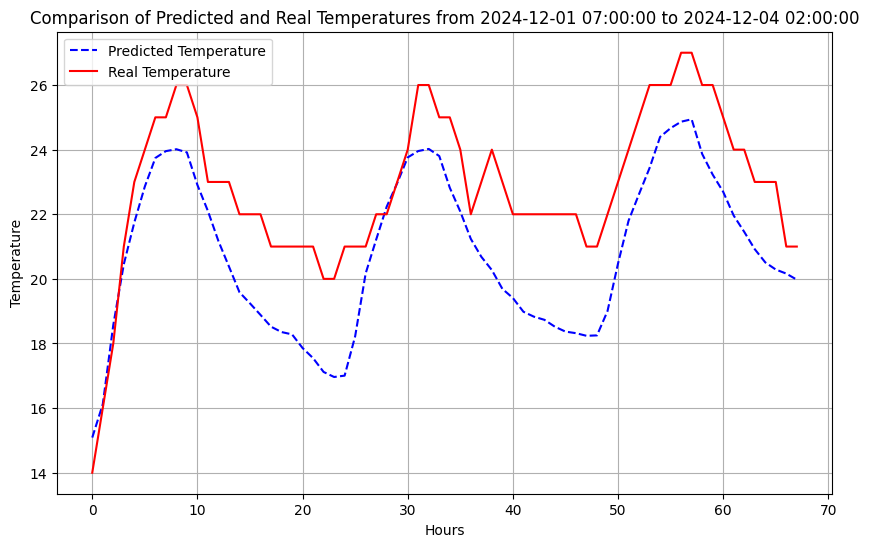

In [24]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ 2 đường
plt.figure(figsize=(10, 6))
plt.plot(pred_df['temperature'], label='Predicted Temperature', color='blue', linestyle='--')
plt.plot(real_df['temperature'], label='Real Temperature', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Temperatures from 2024-12-01 07:00:00 to 2024-12-04 02:00:00')
plt.xlabel('Hours')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

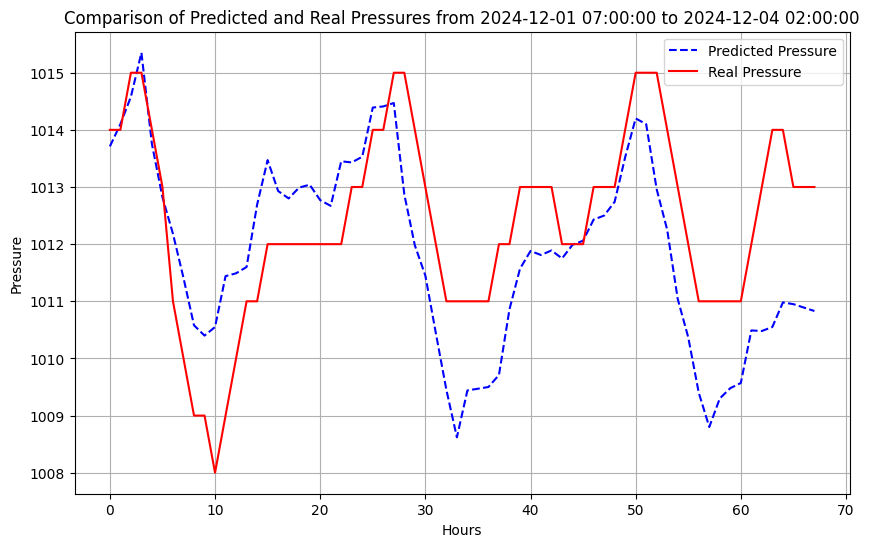

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['pressure'], label='Predicted Pressure', color='blue', linestyle='--')
plt.plot(real_df['pressure'], label='Real Pressure', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Pressures from 2024-12-01 07:00:00 to 2024-12-04 02:00:00')
plt.xlabel('Hours')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)
plt.show()

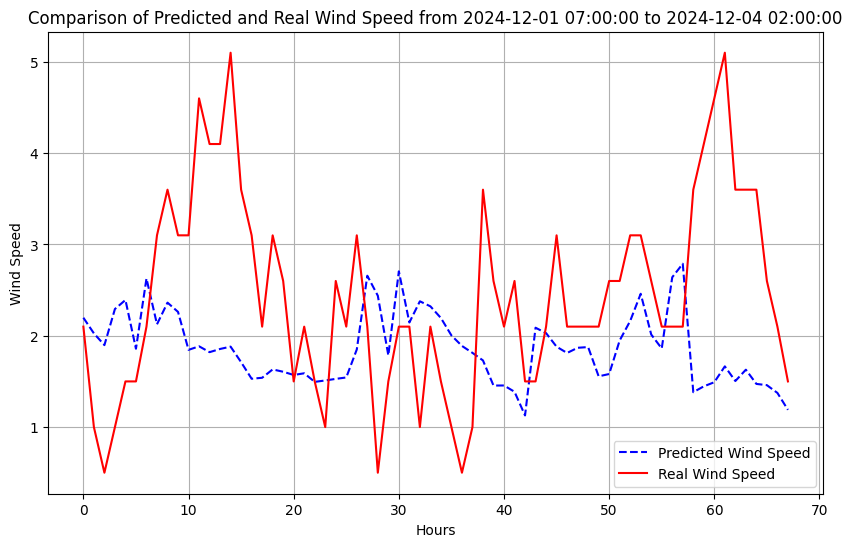

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['wind_speed'], label='Predicted Wind Speed', color='blue', linestyle='--')
plt.plot(real_df['wind_speed'], label='Real Wind Speed', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Wind Speed from 2024-12-01 07:00:00 to 2024-12-04 02:00:00')
plt.xlabel('Hours')
plt.ylabel('Wind Speed')
plt.legend()
plt.grid(True)
plt.show()

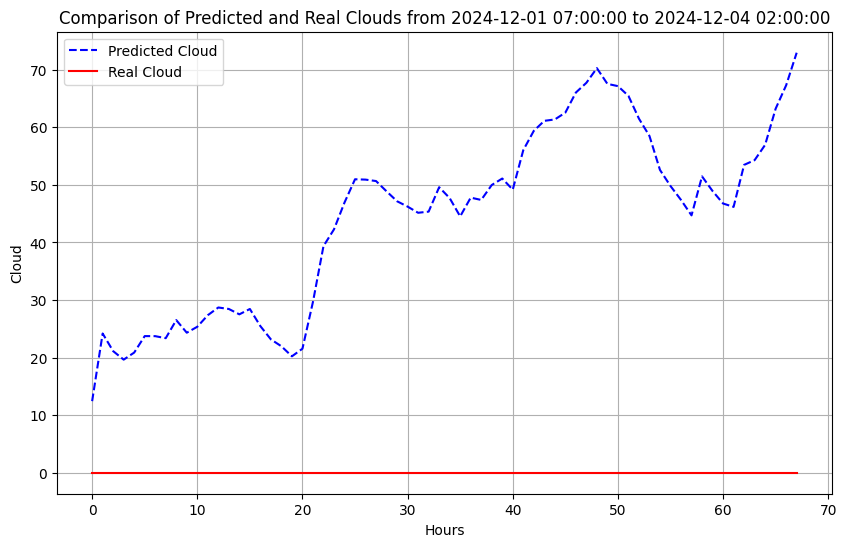

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['cloud'], label='Predicted Cloud', color='blue', linestyle='--')
plt.plot(real_df['cloud'], label='Real Cloud', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Clouds from 2024-12-01 07:00:00 to 2024-12-04 02:00:00')
plt.xlabel('Hours')
plt.ylabel('Cloud')
plt.legend()
plt.grid(True)
plt.show()

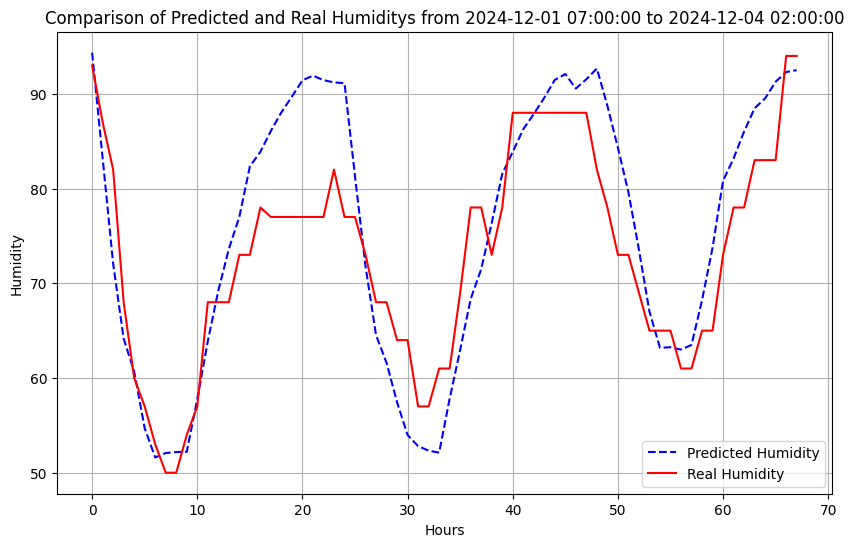

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['humidity'], label='Predicted Humidity', color='blue', linestyle='--')
plt.plot(real_df['humidity'], label='Real Humidity', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Humiditys from 2024-12-01 07:00:00 to 2024-12-04 02:00:00')
plt.xlabel('Hours')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()

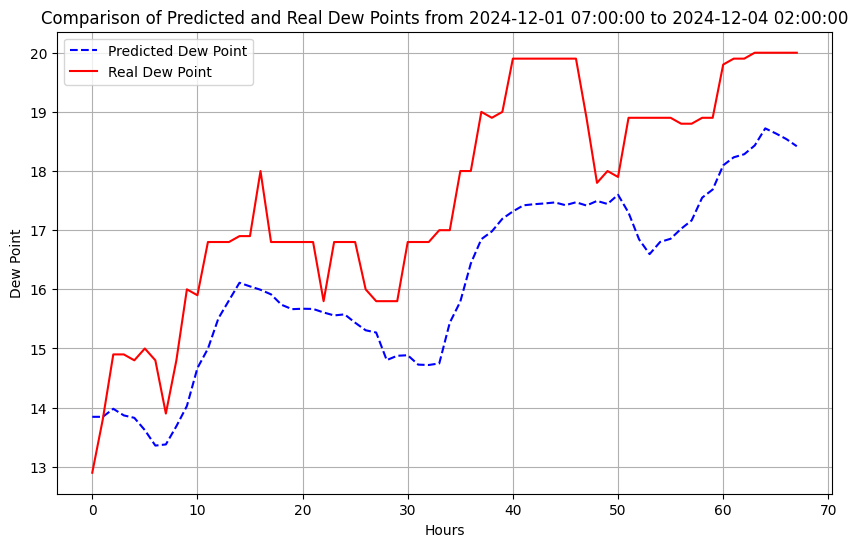

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['dew_point'], label='Predicted Dew Point', color='blue', linestyle='--')
plt.plot(real_df['dew_point'], label='Real Dew Point', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Dew Points from 2024-12-01 07:00:00 to 2024-12-04 02:00:00')
plt.xlabel('Hours')
plt.ylabel('Dew Point')
plt.legend()
plt.grid(True)
plt.show()

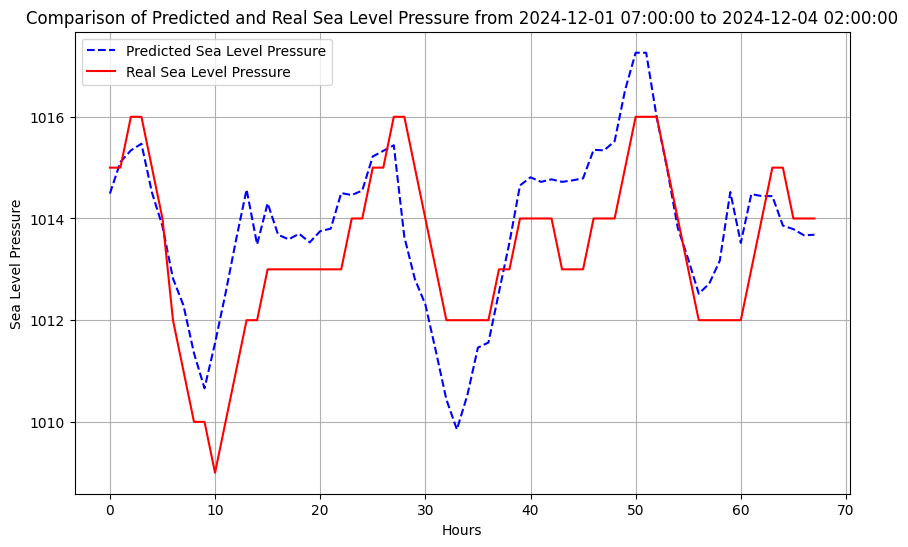

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['sea_level_pressure'], label='Predicted Sea Level Pressure', color='blue', linestyle='--')
plt.plot(real_df['sea_level_pressure'], label='Real Sea Level Pressure', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Sea Level Pressure from 2024-12-01 07:00:00 to 2024-12-04 02:00:00')
plt.xlabel('Hours')
plt.ylabel('Sea Level Pressure')
plt.legend()
plt.grid(True)
plt.show()

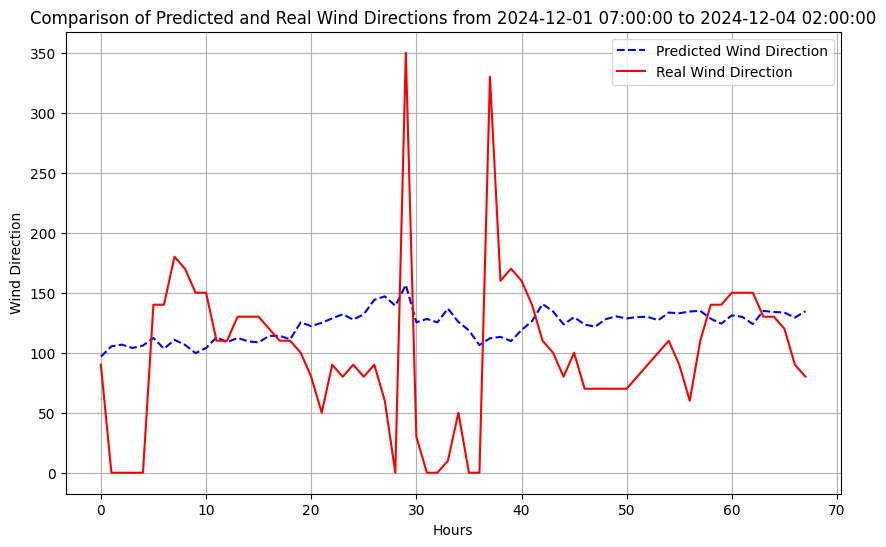

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['wind_direction'], label='Predicted Wind Direction', color='blue', linestyle='--')
plt.plot(real_df['wind_direction'], label='Real Wind Direction', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Wind Directions from 2024-12-01 07:00:00 to 2024-12-04 02:00:00')
plt.xlabel('Hours')
plt.ylabel('Wind Direction')
plt.legend()
plt.grid(True)
plt.show()

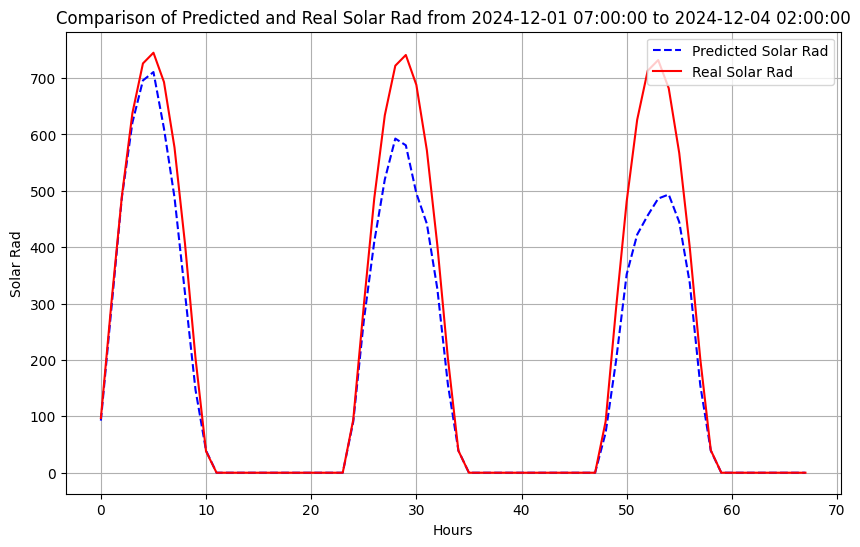

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['solar_rad'], label='Predicted Solar Rad', color='blue', linestyle='--')
plt.plot(real_df['solar_rad'], label='Real Solar Rad', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Solar Rad from 2024-12-01 07:00:00 to 2024-12-04 02:00:00')
plt.xlabel('Hours')
plt.ylabel('Solar Rad')
plt.legend()
plt.grid(True)
plt.show()

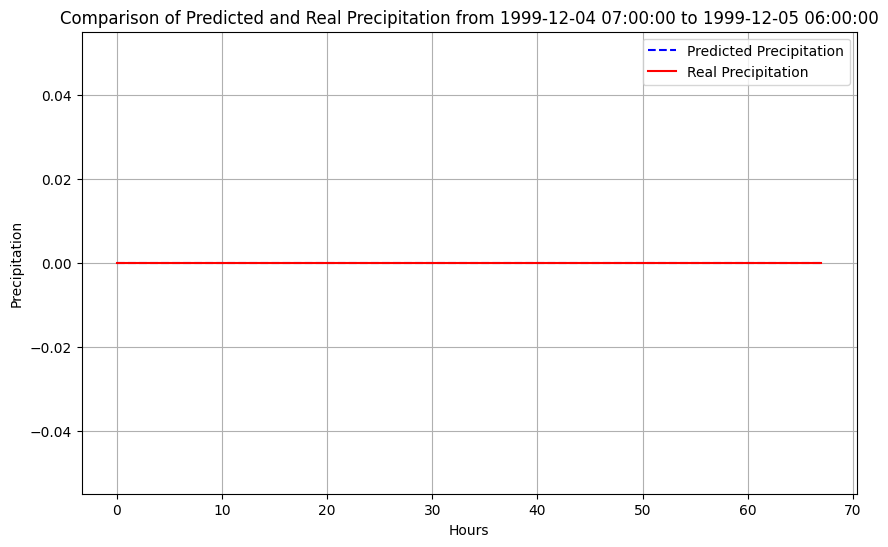

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(pred_df['precipitation'], label='Predicted Precipitation', color='blue', linestyle='--')
plt.plot(real_df['precipitation'], label='Real Precipitation', color='red', linestyle='-')
plt.title('Comparison of Predicted and Real Precipitation from 1999-12-04 07:00:00 to 1999-12-05 06:00:00')
plt.xlabel('Hours')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.show()